In [378]:
# gzip *.zip
# gunzip for gz

SyntaxError: invalid syntax (<ipython-input-378-0a518a5acc7c>, line 3)

In [7]:
# imbd_prin['tconst'] = imbd_prin['tconst'].str.replace(r'\tt', '')
# imbd_prin

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [372]:
bom = pd.read_csv('../Expanded CSVs/bom.movie_gross.csv')

In [369]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [364]:
bom.foreign_gross = bom.foreign_gross.fillna(0)

In [7]:
tn = pd.read_csv('../Expanded CSVs/tn.movie_budgets.csv')

In [8]:
tn.sample(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
4306,7,"Oct 31, 2008",The Haunting of Molly Hartley,"$5,000,000","$13,442,412","$15,318,257"
3523,24,"Dec 25, 2004",Darkness,"$10,600,000","$22,163,442","$34,409,206"


In [9]:
tn['release_date'] = pd.to_datetime(tn['release_date'])

In [10]:
tn['release_year'] = tn['release_date'].dt.year
tn['release_month'] = tn['release_date'].dt.month

In [11]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
release_year         5782 non-null int64
release_month        5782 non-null int64
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 361.5+ KB


In [14]:
#converting all of the dollar amounts to numbers
tn['production_budget'] = tn['production_budget'].replace('[\$,]','',regex=True).astype('int64')
tn['domestic_gross'] = tn['domestic_gross'].replace('[\$,]','',regex=True).astype('int64')
tn['worldwide_gross'] = tn['worldwide_gross'].replace('[\$,]','',regex=True).astype('int64')
tn.sample(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
3422,23,2013-11-15,La grande bellezza,12000000,2883879,29549145,2013,11
3858,59,1951-02-23,Quo Vadis?,8250000,30000000,30028513,1951,2
4375,76,2008-05-30,Stuck,5000000,67505,67505,2008,5
746,47,2015-01-16,Blackhat,70000000,8005980,19665004,2015,1
3201,2,1999-05-14,Tea with Mussolini,14000000,14395874,14395874,1999,5


In [21]:
tn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
release_year         5782 non-null int64
release_month        5782 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 361.5+ KB


In [29]:
rt_reviews = pd.read_csv('../Expanded CSVs/rt.reviews.tsv', sep='\t', encoding='unicode_escape')
rt_movie_info = pd.read_csv('../Expanded CSVs/rt.movie_info.tsv', sep='\t')

In [30]:
rt_movie_info.sample(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
670,858,Jed Weintrob directed this look at how Interne...,R,Drama,Jed Weintrob,Jed Weintrob|Andrew Osborne,"Sep 24, 2003","Feb 24, 2004",$,"25,658",93 minutes,Indican Pictures
667,855,"Between giving up his super powers, confrontin...",PG,Action and Adventure|Science Fiction and Fantasy,Richard Lester|Richard Donner,Mario Puzo|David Newman|Leslie Newman,"Jun 19, 1981","May 1, 2001",NaN,NaN,127 minutes,NaN


In [31]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [32]:
# convert to datetime formats
rt_movie_info['theater_date'] = pd.to_datetime(rt_movie_info['theater_date'])
rt_movie_info['dvd_date'] = pd.to_datetime(rt_movie_info['dvd_date'])

In [33]:
# add year and month columns
rt_movie_info['release_year'] = rt_movie_info['theater_date'].dt.year
rt_movie_info['release_month'] = rt_movie_info['theater_date'].dt.month

In [34]:
# fill all NaN values with 0 in 'box_office'
rt_movie_info['box_office'].fillna(0, inplace=True)

In [367]:
# remove the commas from 'box_office' and convert to int32 type
rt_movie_info['box_office'] = rt_movie_info['box_office'].replace(',','',regex=True).astype('int64')

In [36]:
rt_movie_info['box_office'].mean()

8261566.451282051

In [300]:
pd.set_option('display.max_columns', 300)

In [371]:
# filter out movies
rt_movie_info[rt_movie_info.groupby('genre')['genre'].transform('count') > 1].head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_year,release_month
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,NaN,0,104 minutes,NaN,1971.0,10.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000,108 minutes,Entertainment One,2012.0,8.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,0,116 minutes,NaN,1996.0,9.0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,0,128 minutes,NaN,1994.0,12.0
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,0,200 minutes,NaN,NaN,NaN


In [89]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 14 columns):
id               1560 non-null int64
synopsis         1498 non-null object
rating           1557 non-null object
genre            1552 non-null object
director         1361 non-null object
writer           1111 non-null object
theater_date     1201 non-null datetime64[ns]
dvd_date         1201 non-null datetime64[ns]
currency         340 non-null object
box_office       1560 non-null int32
runtime          1530 non-null object
studio           494 non-null object
release_year     1201 non-null float64
release_month    1201 non-null float64
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(8)
memory usage: 164.7+ KB


In [37]:
rt_movie_info.sample(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_year,release_month
260,338,"""Hereafter"" tells the story of three people wh...",PG-13,Drama|Mystery and Suspense,Clint Eastwood,Peter Morgan,2010-10-22,2011-03-15,$,32741596,126 minutes,Warner Bros. Pictures,2010.0,10.0
368,478,Tinto Brass scored his first major internation...,R,Art House and International|Cult Movies|Drama,Tinto Brass,Tinto Brass|Ennio De Concini|Maria Pia Fusco,1976-12-31,2006-09-12,NaN,0,110 minutes,NaN,1976.0,12.0
1295,1673,Capo di tutti-frutti: Mob biggie is captured a...,R,Action and Adventure|Comedy|Drama|Mystery and ...,NaN,Gina Goldman|Josh McKinney|Wayne Rice,1997-04-17,1998-10-20,NaN,0,106 minutes,NaN,1997.0,4.0
1038,1342,It is not easy being a 9 year old in a new cou...,PG,Action and Adventure|Comedy|Kids and Family,Uli Edel|Ulrich Edel,Karey Kirkpatrick|Larry Wilson|Nicholas Waller,2000-10-27,2001-03-06,$,13432508,105 minutes,New Line Cinema,2000.0,10.0
1299,1679,NaN,NR,Horror,NaN,NaN,NaT,NaT,NaN,0,97 minutes,NaN,NaN,NaN


In [340]:
# filter movies after 1990
rt = rt_movie_info.copy() #[rt_movie_info['release_year'] > 1990]

# filter movies that genres have genre.value_counts < 1
rt = rt[rt.groupby('genre')['genre'].transform('count') > 5]

Drama                                151
Comedy                               110
Comedy|Drama                          80
Drama|Mystery and Suspense            67
Art House and International|Drama     62
Name: genre, dtype: int64

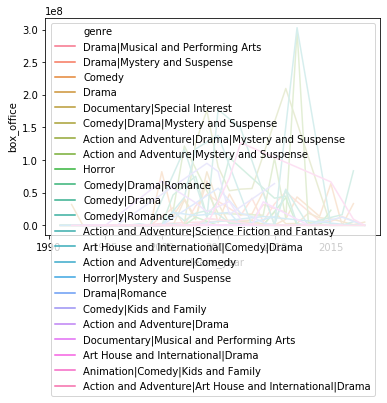

In [314]:
sns.lineplot(x="release_year", y="box_office", data=rt, ci=None, hue='genre');

In [330]:
rt.sum()

id                                                                        519533
rating                         RRPG-13RRNRRRRRPG-13RRRRRPGNRRRRPG-13RRPG-13RR...
genre                          Drama|Musical and Performing ArtsDrama|Mystery...
box_office                                                            9197461070
release_year                                                         1.01217e+06
release_month                                                               3351
Special Interest                                                               6
Science Fiction and Fantasy                                                   13
Mystery and Suspense                                                          98
Kids and Family                                                               16
Romance                                                                       61
Art House and International                                                   53
Comedy                      

In [315]:
rt.columns

Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio', 'release_year', 'release_month'],
      dtype='object')

In [381]:
# [a.split('|') for a in rt['genre']]
# [y for x in list_of_lists for y in x]

set_of_lists = set([y for x in [a.split('|') for a in rt['genre']] for y in x])
set_of_lists

{'Action and Adventure',
 'Animation',
 'Art House and International',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Horror',
 'Kids and Family',
 'Musical and Performing Arts',
 'Mystery and Suspense',
 'Romance',
 'Science Fiction and Fantasy',
 'Special Interest',
 'Television',
 'Western'}

In [334]:
# [a.split('|') for a in rt['genre']]

In [382]:
# for x in rt['genre']:
#     print(x.split('|'))


def genre_finder(genre, cell):
    if genre in cell:
        return 1
    return 0

def column_creator(set_of_lists):
    for genre in set_of_lists:
        rt[genre] = rt['genre'].map(lambda cell: genre_finder(genre, cell))

In [383]:
column_creator(set_of_lists)

In [384]:
rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,release_year,release_month,Television,Special Interest,Science Fiction and Fantasy,Mystery and Suspense,Classics,Romance,Kids and Family,Comedy,Musical and Performing Arts,Western,Art House and International,Horror,Drama,Animation,Documentary,Action and Adventure
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,$,600000,108 minutes,Entertainment One,2012.0,8.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,NaN,0,116 minutes,NaN,1996.0,9.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,NaN,0,128 minutes,NaN,1994.0,12.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaT,NaN,0,200 minutes,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,2002-06-18,$,41032915,82 minutes,Paramount Pictures,2002.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [387]:
box_office_total = []

for genre in set_of_lists:
    box_office_total.append(rt[rt[genre]==1].box_office.mean())

In [386]:
box_office_total

[0.0,
 162286.2142857143,
 25680299.49122807,
 10838706.03076923,
 146590.9090909091,
 11579412.365671642,
 25449299.269230768,
 11716040.789340101,
 3561239.736842105,
 2719774.785714286,
 261613.23225806453,
 3865404.4482758623,
 6889880.56779661,
 31037477.615384616,
 2469843.289473684,
 15993491.033018868]